# Entrenamiento de red Feedforward 

Con el dataset creado anteriormente con 1000 características y una columna para clase, vamos a entrenar la red FF con múltiples corridas guardando cada una

In [1]:
#Llamamos las librerías
import numpy as np
import pandas as pd
!pip install tensorflow-gpu
import tensorflow as tf
from tensorflow import keras

In [2]:
#Llamamos el dataset a un dataframe de pandas
dataset = pd.read_csv("../Datasets/DataSet_NoVehiculo_Vehiculo.csv")
#Ahora lo dividimos en salida y entrada, la salida es la última columna
#0 indica NO VEHICULO
#1 indica VEHICULO
Y = dataset[dataset.columns[-1]]
X = dataset[dataset.columns[:-1]]
#Separamos en Test y Train con ayuda de sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from numba import cuda
from tensorflow.keras.models import load_model

In [4]:
#Acá se entrenará y codificará la arquitectura 7 para la red de vehículo o no vehículo
#100 épocas con un batch_size sin especificar
#100 corridas por cada arquitectura
#Learning rate de 0.0001
#Optimizador, Descenso de gradiente estocástico
history = []
best_val_history = []
for i in range(1,101):
    modelo = Sequential()
    modelo.add(Dense(750,input_shape=(1500,),activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(Dense(350, activation='relu',kernel_initializer='random_normal',bias_initializer='zeros'))
    modelo.add(Dense(1,activation='sigmoid',kernel_initializer='random_normal',bias_initializer='zeros'))
    mcp_save = ModelCheckpoint('Arquitectura7_LR_0_0001/arq7_'+str(i)+'.hdf5', save_best_only=True, monitor='val_loss', mode='min',save_weights_only=False)
    modelo.compile(optimizer=tf.keras.optimizers.SGD(lr=0.0001), loss='binary_crossentropy',metrics=['acc'])
    history.append(modelo.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100, batch_size=20,callbacks=[mcp_save]))        
    del modelo
    
    

Epoch 1/100
257/257 [==============================] - 1s 2ms/step - loss: 0.7791 - acc: 0.5899 - val_loss: 0.7090 - val_acc: 0.6165
Epoch 2/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6846 - acc: 0.6169 - val_loss: 0.6963 - val_acc: 0.6256
Epoch 3/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6703 - acc: 0.6354 - val_loss: 0.6857 - val_acc: 0.6379
Epoch 4/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6578 - acc: 0.6467 - val_loss: 0.6755 - val_acc: 0.6488
Epoch 5/100
257/257 [==============================] - 0s 1ms/step - loss: 0.6461 - acc: 0.6596 - val_loss: 0.6647 - val_acc: 0.6652
Epoch 6/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6350 - acc: 0.6703 - val_loss: 0.6562 - val_acc: 0.6788
Epoch 7/100
257/257 [==============================] - 0s 2ms/step - loss: 0.6246 - acc: 0.6832 - val_loss: 0.6467 - val_acc: 0.6847
Epoch 8/100
257/257 [==============================] - 0s 1ms/step - 

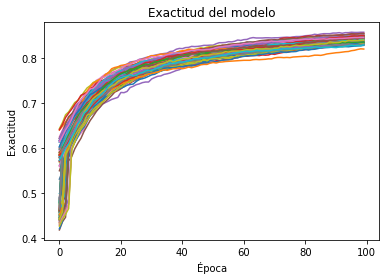

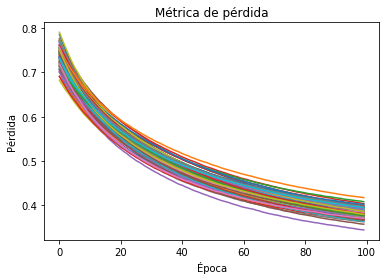

In [5]:
from matplotlib import pyplot as plt
for i in range(len(history)):
  plt.plot(history[i].history['val_acc'])
plt.title('Exactitud del modelo')
plt.ylabel('Exactitud')
plt.xlabel('Época')
plt.show()
# "Loss"
for i in range(len(history)):
  plt.plot(history[i].history['val_loss'])
plt.title('Métrica de pérdida')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.show()

In [6]:
best_val_history = []
for i in range(1,101):
    modelo = load_model('Arquitectura7_LR_0_0001/arq7_'+str(i)+'.hdf5')
    best_val_history.append(modelo.evaluate(x=X_test, y=Y_test))
    del modelo

69/69 [==============================] - 0s 886us/step - loss: 0.3950 - acc: 0.8289


In [7]:
prom_loss = 0.0;
prom_acc = 0.0;
for i in range(len(best_val_history)):
    prom_loss = prom_loss + best_val_history[i][0]
    prom_acc = prom_acc + best_val_history[i][1]

prom_loss = prom_loss / len(best_val_history)
prom_acc = prom_acc / len(best_val_history)

print(prom_loss)
print(prom_acc)

0.3815482857823372
0.8397088277339936


In [8]:
#Para liberar la memoria del GPU
cuda.select_device(0)
cuda.close()